In [404]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [405]:
data=pd.read_csv('power_plant.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [406]:
data.shape

(907, 27)

In [407]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [408]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [409]:
#droping the column having null valued in all the rows
data=data.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],1)
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [410]:
#droping th column that does not effect on the label 
data=data.drop(['country','country_long','name','source','url','gppd_idnr','owner','commissioning_year','year_of_capacity_data'],1)
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,WRI,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Oil,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [411]:
data.isna().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [412]:
#droping other fuel1 because no of null values are very high nearly 700 
data=data.drop(['other_fuel1'],1)


In [413]:
data=data.dropna()
data.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
3,135.0,23.8712,91.3602,Gas,WRI,617.789264,843.7470,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,WRI,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,Central Electricity Authority
5,250.0,23.7689,68.6447,Coal,WRI,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,Central Electricity Authority
6,60.0,10.4547,77.0078,Hydro,WRI,157.558250,152.1952,61.421350,89.629600,48.327150,Central Electricity Authority
7,192.0,32.2258,77.2070,Hydro,WRI,674.391100,721.3352,675.724400,679.594950,579.318850,Central Electricity Authority


In [414]:
data.shape

(385, 11)

In [415]:
data.describe()


,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,640.274743,21.696279,79.268877,2510.685975,2636.161828,2663.578355,2705.235164,2797.870947
std,743.287233,6.750157,5.107958,4070.550482,4332.263829,4341.935961,4384.682560,4539.626068
min,26.000000,8.169100,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.750000,16.640000,76.141800,251.943950,252.501150,210.930050,203.596900,229.874850
50%,394.000000,22.325600,77.980000,882.664500,909.000000,933.370000,858.734750,940.390000
75%,1000.000000,26.487500,82.293000,3107.282000,3378.120000,3365.746000,3459.695000,3319.054000
max,4760.000000,34.490300,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [540]:
# filling the nan values by means and mode
#data['other_fuel1']=data['other_fuel1'].fillna(data['other_fuel1'].mode()[0])
data['latitude']=data['latitude'].fillna(data['latitude'].mean())
data['longitude']=data['longitude'].fillna(data['longitude'].mean())

In [417]:
#data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])
#data['owner']=data['owner'].fillna(data['owner'].mode()[0])
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
#data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0])
data['generation_data_source']=data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_gwh_2018']=data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())

In [418]:
data.isna().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

All the null values has been filled

In [419]:
data.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
geolocation_source         object
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

using encoder to convert string into the numeric format

In [420]:
from sklearn.preprocessing import LabelEncoder

In [423]:
lab_enc=LabelEncoder()
df3=lab_enc.fit_transform(data['primary_fuel'])
data['primary_fuel']=df3

In [426]:
lab_enc=LabelEncoder()
df6=lab_enc.fit_transform(data['geolocation_source'])
data['geolocation_source']=df6

In [427]:
lab_enc=LabelEncoder()
df7=lab_enc.fit_transform(data['generation_data_source'])
data['generation_data_source']=df7

In [428]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
3,135.0,23.8712,91.3602,1,0,617.789264,843.7470,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,0,0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,0
5,250.0,23.7689,68.6447,0,0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,0
6,60.0,10.4547,77.0078,2,0,157.558250,152.1952,61.421350,89.629600,48.327150,0
7,192.0,32.2258,77.2070,2,0,674.391100,721.3352,675.724400,679.594950,579.318850,0


In [429]:
data.shape

(385, 11)

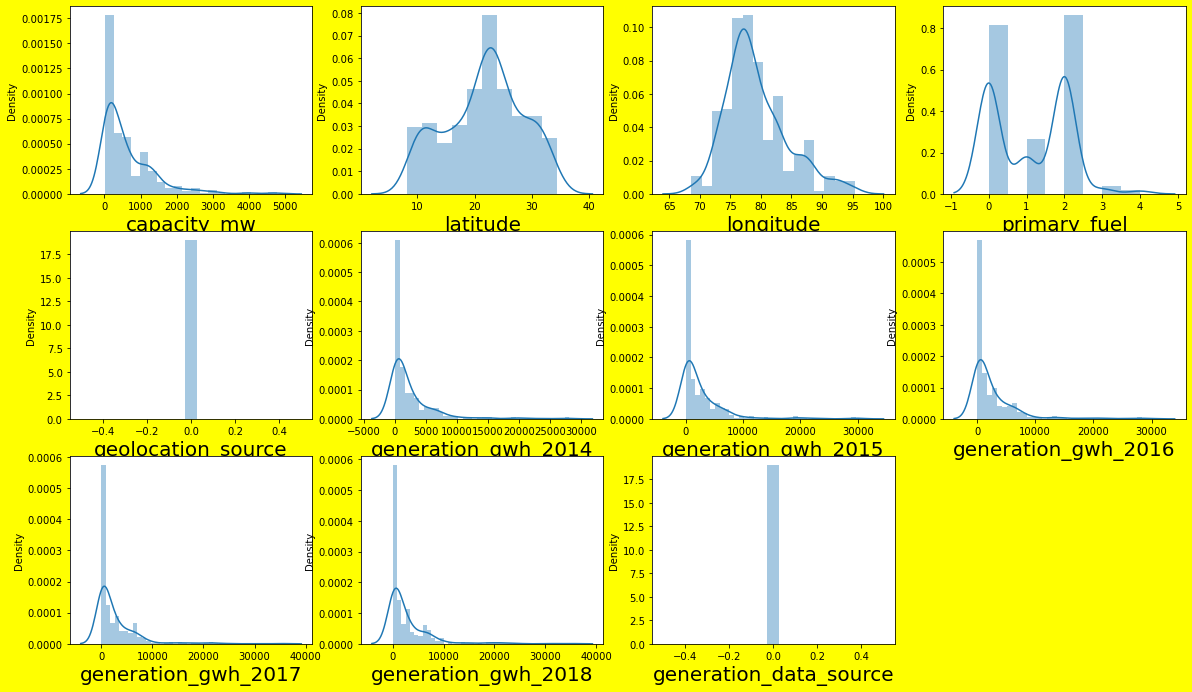

In [430]:
plt.figure(figsize=(20,20),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [431]:
data.corr()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
capacity_mw,1.000000,0.034079,-0.009168,-0.489104,NaN,0.837397,0.869655,0.895368,0.902214,0.915306,NaN
latitude,0.034079,1.000000,0.114790,0.016271,NaN,0.051562,0.045041,0.040880,0.059071,0.048709,NaN
longitude,-0.009168,0.114790,1.000000,-0.172285,NaN,0.010749,0.033744,0.055583,0.066631,0.062561,NaN
primary_fuel,-0.489104,0.016271,-0.172285,1.000000,NaN,-0.415422,-0.432535,-0.440490,-0.446759,-0.446221,NaN
geolocation_source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.837397,0.051562,0.010749,-0.415422,NaN,1.000000,0.960653,0.936329,0.912093,0.901734,NaN
generation_gwh_2015,0.869655,0.045041,0.033744,-0.432535,NaN,0.960653,1.000000,0.978715,0.953315,0.945160,NaN
generation_gwh_2016,0.895368,0.040880,0.055583,-0.440490,NaN,0.936329,0.978715,1.000000,0.977779,0.969229,NaN
generation_gwh_2017,0.902214,0.059071,0.066631,-0.446759,NaN,0.912093,0.953315,0.977779,1.000000,0.987828,NaN
generation_gwh_2018,0.915306,0.048709,0.062561,-0.446221,NaN,0.901734,0.945160,0.969229,0.987828,1.000000,NaN


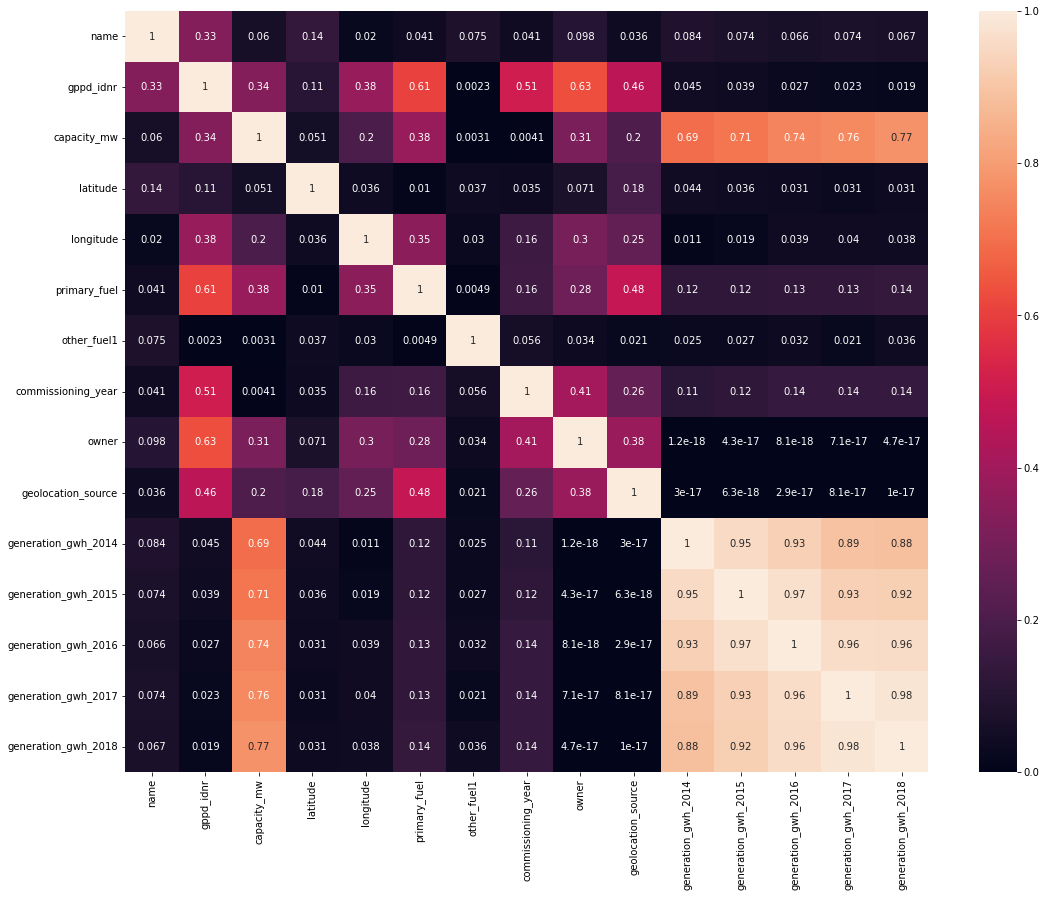

In [432]:
#df=data.drop(['generation_data_source','year_of_capacity_data'],1)
data_corr=df.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()

In heat map we can see many feaatures are corelated but they are from different years so no column has been droped 

#Split the data into features and two label that is primary fuel anf capicity in mw

In [433]:
z=data['primary_fuel']
y=data['capacity_mw']
X=data.drop(columns=['primary_fuel','capacity_mw'])

In [434]:
z.head()

3    1
4    0
5    0
6    2
7    2
Name: primary_fuel, dtype: int32

In [435]:
y.head()

3     135.0
4    1800.0
5     250.0
6      60.0
7     192.0
Name: capacity_mw, dtype: float64

In [436]:
X.head()

,latitude,longitude,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
3,23.8712,91.3602,0,617.789264,843.7470,886.004428,663.774500,626.239128,0
4,21.9603,82.4091,0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,0
5,23.7689,68.6447,0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,0
6,10.4547,77.0078,0,157.558250,152.1952,61.421350,89.629600,48.327150,0
7,32.2258,77.2070,0,674.391100,721.3352,675.724400,679.594950,579.318850,0


In [534]:
data.skew()


capacity_mw               2.228079
latitude                 -0.191408
longitude                 0.877964
primary_fuel              0.178221
geolocation_source        0.000000
generation_gwh_2014       3.293382
generation_gwh_2015       3.518539
generation_gwh_2016       3.364050
generation_gwh_2017       3.461765
generation_gwh_2018       3.343555
generation_data_source    0.000000
dtype: float64

APPLYING THE POWER TRANSFORMATION TO REMOVE THE SHEWNESS FROM THE DATA

In [437]:
from sklearn.preprocessing import power_transform

In [438]:
x_new=power_transform(X)


In [439]:
x_new

array([[ 0.3064066 ,  1.94952859,  0.        , ..., -0.19205615,
        -0.23540921,  0.        ],
       [ 0.01878347,  0.74962578,  0.        , ...,  1.05273047,
         1.25123377,  0.        ],
       [ 0.2909325 , -3.0237682 ,  0.        , ...,  0.08928422,
        -0.01271598,  0.        ],
       ...,
       [-0.23261723,  0.0954963 ,  0.        , ...,  0.0153252 ,
        -0.03238595,  0.        ],
       [ 1.29512488, -0.21640739,  0.        , ..., -0.7676968 ,
        -0.66462399,  0.        ],
       [ 1.26469131, -0.27291417,  0.        , ...,  0.6886215 ,
         0.64492898,  0.        ]])

In [440]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

longitude                 0.009850
geolocation_source        0.000000
generation_data_source    0.000000
generation_gwh_2015      -0.046059
generation_gwh_2014      -0.049760
generation_gwh_2016      -0.058472
generation_gwh_2018      -0.067296
generation_gwh_2017      -0.073510
latitude                 -0.118382
dtype: float64

APPLYING THE STANDARD SCALER TRANSFORMATION

In [535]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_new)


APPLYING TRAIN TEST SPLIT ON THE DATA 

In [536]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=49)
y_train.head()

499     126.0
809     240.0
592      32.0
720     500.0
494    4000.0
Name: capacity_mw, dtype: float64

# FOR PRIMARY FUEL-CLASSIFICATION ALGORITHM HAS BEEN USED,
   FOR CAPACITY -REGRESSION ALGORITHM HAS BEEN USED

# FOR CAPACITY -REGRESSION ALGORITHM HAS BEEN USED

FIRST ALGORITHM- LINEAR REGRESSION

In [446]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [447]:
regression.score(x_train,y_train)

0.5960025446433953

In [448]:
regression.score(x_test,y_test)

0.5961965952341433

In [449]:
y_pred=regression.predict(x_test)

In [450]:
y_pred

array([1200.53907644, 1348.10676023,  993.37131956,  577.67329338,
       1436.83292365,  419.03887353,  251.14639304,   42.23784392,
       1648.46496624,  506.65692462, 1107.58996318, 1300.51623935,
       1269.11940305, 1357.89614038,  692.49425829,  427.67410585,
        416.99010383,  982.57415575,  787.58194435, 1321.14542513,
        -66.6204363 ,  762.9806498 ,  713.25258177, 1032.07286311,
         63.0570574 ,  632.37062874,  785.69029794,  536.09527867,
       1907.25243429, 1038.18782311,   37.25073404, 1446.72715345,
        288.03319377,  625.54980631,  419.73182797,   11.65274606,
        217.41383584,  760.1114135 , 1069.7206146 ,  796.74579799,
         24.38198819,  521.21878933, 1223.55303698, 1376.98461149,
        373.39430976,  556.54490195,  127.94384453, 1063.4314793 ,
        -90.45801712, 1386.27093138, 1374.1074985 ,  464.84354874,
       1485.60727904, 1466.1554064 ,  260.42839575, 1285.05034485,
       1450.48179773, 1397.51380097,  296.18618505,  469.89040

# ADA BOOST

In [451]:
from sklearn.ensemble import AdaBoostRegressor

In [452]:
ada=AdaBoostRegressor()

In [453]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [454]:
y_pred1=ada.predict(x_train)

In [455]:
from sklearn import metrics

In [456]:
accuracy=metrics.r2_score(y_train,y_pred1)
accuracy

0.8959752724608498

In [457]:
y_test_pred=ada.predict(x_test)

In [458]:
accuracy=metrics.r2_score(y_test,y_test_pred)
accuracy

0.7003088211121732

REGULARIZATION

In [459]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [460]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [461]:
alpha=lasscv.alpha_
alpha

0.29168862183251226

In [462]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.29168862183251226)

In [463]:
y_pred2=lasso_reg.predict(x_test)
y_pred2

array([1199.69364852, 1347.16583244,  993.43734845,  578.09551979,
       1436.29295092,  419.46988251,  251.74254415,   43.20249513,
       1647.38506633,  507.1449233 , 1107.74079754, 1300.40032505,
       1269.15414763, 1357.62718872,  692.91735789,  428.12836386,
        416.64308204,  982.74005278,  787.70177894, 1320.34794837,
        -66.5781302 ,  763.31165381,  713.56748814, 1032.15813775,
         64.1750429 ,  632.06222268,  785.99845613,  535.75722717,
       1906.32693668, 1038.18734384,   38.360906  , 1446.49635182,
        288.32540226,  625.3681323 ,  420.26311761,   12.17719178,
        217.09670842,  759.47668945, 1069.04545902,  796.30185404,
         25.12724437,  520.91360283, 1223.46227771, 1376.29814401,
        374.24334362,  556.80011878,  127.66862714, 1062.93389039,
        -89.74806009, 1385.50168566, 1373.1341665 ,  464.56184319,
       1485.30628111, 1465.83464091,  261.2468976 , 1284.94169527,
       1449.81973526, 1397.0378614 ,  295.81775797,  469.42166

In [464]:
y_test

171     500.0
816     750.0
510     440.0
136     231.0
618    1080.0
        ...  
619     172.0
168    1200.0
173     280.0
350    1000.0
569     175.0
Name: capacity_mw, Length: 97, dtype: float64

In [465]:
lasso_reg.score(x_test,y_test)

0.5963402582303086

In [466]:
from sklearn.metrics import r2_score

In [467]:
r2= r2_score(y_test,y_pred2)

In [468]:
r2

0.5963402582303086

CROSS VALIDATION ON ADA BOOST 

In [469]:
from sklearn.model_selection import cross_val_score

In [483]:
scores = cross_val_score(ada, X, y, cv=10)
scores

array([0.74335282, 0.78066817, 0.62145432, 0.74926792, 0.72546416,
       0.85455307, 0.59512889, 0.87384609, 0.80034639, 0.86935472])

In [484]:
cross_val_score(ada, X, y, cv=10).mean()

0.7516191199497387

# XGB BOOST ALGORITHM

In [487]:
import xgboost as xgb

In [489]:
xgb=xgb.XGBRegressor()

In [490]:
xgb.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [491]:
y_pred5=xgb.predict(x_test)

In [492]:
r2_score(y_test,y_pred5)

0.7706136020434315

CROSS VALIDATION ON XGBOOST ALGORITHM

In [493]:
scores = cross_val_score(xgb, X, y, cv=10)
scores

array([0.86641376, 0.75246691, 0.77099263, 0.80189309, 0.74690419,
       0.86584951, 0.59813753, 0.85072762, 0.81067139, 0.91043032])

In [494]:
cross_val_score(xgb, X, y, cv=10).mean()

0.7974486944349188

FROM ABOVE OBSERVATION I HAVE CHOOSEN XGB BOOST ALGORITHM FOR PREDICTING CAPACITY IN MW 

# CLASSIFICATION MODEL FOR PRIMARY FUEL

APPLYING STANDARD SCALER BECAUSE LABEL IN THIS PART HAS BEEN CHANGED AS PRIMARY FUEL

In [495]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X_scaled,z,test_size=.25,random_state=49)
y_train1.head()

499    2
809    0
592    2
720    0
494    0
Name: primary_fuel, dtype: int32

# KNEIGHBORS CLASSIFIER

In [473]:
from sklearn.neighbors import KNeighborsClassifier

In [474]:
knn=KNeighborsClassifier()

In [475]:
knn.fit(x_train1,y_train1)

KNeighborsClassifier()

In [476]:
y_pred4=knn.predict(x_test1)

In [477]:
from sklearn.metrics import confusion_matrix,classification_report

In [478]:
cfm=confusion_matrix(y_test1,y_pred4)
cfm

array([[36,  2,  1,  0,  0],
       [ 1,  1, 11,  0,  0],
       [ 4,  2, 34,  0,  0],
       [ 3,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0]], dtype=int64)

In [479]:
print(classification_report(y_test1,y_pred4,digits=2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        39
           1       0.20      0.08      0.11        13
           2       0.72      0.85      0.78        40
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2

    accuracy                           0.73        97
   macro avg       0.34      0.37      0.35        97
weighted avg       0.65      0.73      0.68        97



# DECISION TREE FOR CLASSIFICATON

In [512]:
from sklearn.tree import DecisionTreeClassifier

In [513]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [514]:
clf=DecisionTreeClassifier()
clf.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [515]:
clf.score(x_train1,y_train1)

1.0

In [516]:
y_pred7=clf.predict(x_test1)
accuracy_score(y_test1,y_pred7)

0.7731958762886598

In [517]:
cfm=confusion_matrix(y_test1,y_pred7)
cfm

array([[34,  4,  1,  0,  0],
       [ 1,  6,  5,  0,  1],
       [ 4,  2, 34,  0,  0],
       [ 3,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1]], dtype=int64)

In [518]:
print(classification_report(y_test1,y_pred7,digits=2))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.46      0.46      0.46        13
           2       0.85      0.85      0.85        40
           3       0.00      0.00      0.00         3
           4       0.50      0.50      0.50         2

    accuracy                           0.77        97
   macro avg       0.52      0.54      0.53        97
weighted avg       0.75      0.77      0.76        97



# HYPERPARAMETER ON DECISION TREE

APPLYING GRIDSEARCH CV

In [519]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(3,10),
    'max_leaf_nodes':range(2,4)
}

In [521]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [522]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [523]:
grid_search.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [524]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [531]:
clf=DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=7,min_samples_leaf=3,max_leaf_nodes=3)
clf.fit(x_train1,y_train1)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=3, min_samples_leaf=3,
                       min_samples_split=3)

In [532]:
y_pred8=clf.predict(x_test1)

In [539]:
accuracy_score(y_test1,y_pred8)

0.711340206185567

FROM ABOVE RESULT ON PRIMARY FUEL DECISION TREE HAS BEEN CONSIDER WITHOUT HYPERPARAMETER TUNING AS DECISION TREE IS SHOWING BETTER RESULT BEFORE HYPERPARAMETER TUNING

SAVING THE MODEL USING PICKLE

In [543]:
import pickle

In [544]:
filename='PRIMARY_FUEL'
pickle.dump(clf,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))

# saving Xgb booster for capacity_mw

In [556]:
filename='PRIMARY_FUEL'
pickle.dump(xgb,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))

TypeError: cannot pickle 'module' object